This skeleton code will get you started with the assignment.

For this assignment you will need at least:

- Pytorch 1.13+
- Sklearn
- Matplotlib

In [1]:
import numpy as np
import torch
import torchaudio
import torch.nn as nn
from IPython.display import Audio

# feel free to add more imports here

C:\Users\Danila\anaconda3\envs\AI\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

print(device)

cuda


# Data Loading
The data consists of waveforms of audioclips sampled 8000 times per second (8 khz).
The data is stored in 16 bit precision to reduce storage size. We first need to
convert the waveforms to 32 bit precision.

In [3]:
sampling_rate = 8_000
languages = ["de", "en", "es", "fr", "nl", "pt"]
language_dict = {languages[i]: i for i in range(len(languages))}

X_train, y_train = np.load("dataset/inputs_train_fp16.npy"), np.load(
    "dataset/targets_train_int8.npy"
)
X_test, y_test = np.load("dataset/inputs_test_fp16.npy"), np.load(
    "dataset/targets_test_int8.npy"
)

X_train, X_test = X_train.astype(np.float32), X_test.astype(np.float32)
y_train, y_test = y_train.astype(np.int32), y_test.astype(np.int32)


# loader for whole dataset

In [40]:
from torch.utils.data import DataLoader, TensorDataset
BATCH_SIZE = 64
data_train = TensorDataset( torch.Tensor(X_train), torch.Tensor(y_train) )
data_test = TensorDataset( torch.Tensor(X_test),torch.Tensor(y_test))

train_loader = torch.utils.data.DataLoader(data_train,batch_size=BATCH_SIZE,shuffle=True)
test_loader = torch.utils.data.DataLoader(data_test,batch_size=BATCH_SIZE,shuffle=True)

In [12]:
print(next(enumerate(train_loader)))

(0, [tensor([[-6.1417e-04, -8.9502e-04,  7.1764e-04,  ..., -3.6774e-02,
         -3.3173e-02, -2.7740e-02],
        [ 2.1667e-03,  3.3150e-03, -5.7564e-03,  ..., -3.6926e-03,
          5.2521e-02,  1.0248e-01],
        [-7.3910e-05, -2.5570e-05, -5.4359e-05,  ...,  3.6831e-03,
          2.2125e-02,  4.2297e-02],
        ...,
        [ 9.0332e-03,  5.5351e-03, -1.1683e-03,  ...,  2.5732e-01,
          3.0835e-01,  3.2031e-01],
        [ 1.6224e-04,  3.8075e-04,  2.0969e-04,  ..., -3.8223e-03,
         -2.1820e-03,  8.8930e-04],
        [-5.2795e-03, -1.0895e-02, -1.1063e-02,  ...,  1.7118e-03,
         -2.3708e-03,  1.7750e-04]]), tensor([4., 3., 5., 2., 3., 0., 5., 2., 0., 2., 1., 5., 1., 4., 3., 5., 0., 3.,
        0., 5., 3., 2., 3., 4., 3., 5., 3., 0., 2., 3., 3., 3., 3., 4., 3., 5.,
        5., 5., 1., 4., 1., 4., 0., 5., 0., 2., 2., 0., 4., 5., 2., 0., 4., 5.,
        4., 0., 4., 5., 1., 5., 2., 0., 0., 2.])])


# Subset dataset to EN and ES only

In [4]:
from torch.utils.data import DataLoader, TensorDataset

#creating boolean mask to subset dataset
mask_train = np.logical_or(y_train == language_dict["en"], y_train == language_dict["es"])
mask_test = np.logical_or(y_test == language_dict["en"], y_test == language_dict["es"])
#subset dataset based on boolean mask
X_train_en_es = X_train[mask_train]
y_train_en_es = y_train[mask_train]
X_test_en_es = X_test[mask_test]
y_test_en_es = y_test[mask_test]
#new target values
y_train_en_es = np.where(y_train_en_es == language_dict["en"], 0, 1)
y_test_en_es = np.where(y_test_en_es == language_dict["en"], 0, 1)

print(X_train_en_es.shape)
print(y_train_en_es.shape)
X_train_en_es = TensorDataset( torch.Tensor(X_train_en_es), torch.Tensor(y_train_en_es) )
X_test_en_es = TensorDataset( torch.Tensor(X_test_en_es),torch.Tensor(y_test_en_es))


(2000, 40000)
(2000,)


## Loader for subset dataset

In [175]:
BATCH_SIZE = 64

train_en_es_loader = torch.utils.data.DataLoader(X_train_en_es,batch_size=BATCH_SIZE,shuffle=True)
test_en_es_loader = torch.utils.data.DataLoader(X_test_en_es,batch_size=BATCH_SIZE,shuffle=True)



NameError: name 'X_train_en_es' is not defined

In [15]:
print(next(enumerate(train_en_es_loader)))

(0, [tensor([[-8.0414e-03, -1.7334e-02, -1.4893e-02,  ..., -2.3743e-02,
         -1.9058e-02, -6.2103e-03],
        [ 1.9538e-04,  5.3167e-05, -6.3360e-05,  ..., -5.0995e-02,
         -5.9662e-02, -4.0375e-02],
        [ 3.5309e-02,  7.0374e-02,  7.3120e-02,  ..., -2.5650e-02,
          8.3740e-02, -1.7975e-02],
        ...,
        [ 1.9501e-02,  2.1393e-02,  1.3916e-02,  ...,  2.6215e-02,
          5.8563e-02,  7.8003e-02],
        [-9.9716e-03, -1.3609e-03, -4.3035e-04,  ...,  1.9627e-03,
         -4.2686e-03,  4.7760e-03],
        [ 1.8001e-05, -4.1723e-06, -4.4107e-06,  ...,  1.3769e-05,
          6.0201e-06,  1.6809e-05]]), tensor([1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
        1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 0., 1., 1., 1., 1., 0.])])


Change the `selected_language` to any of the 6 language codes, and re-run the cell below to hear some random clips from the training data.

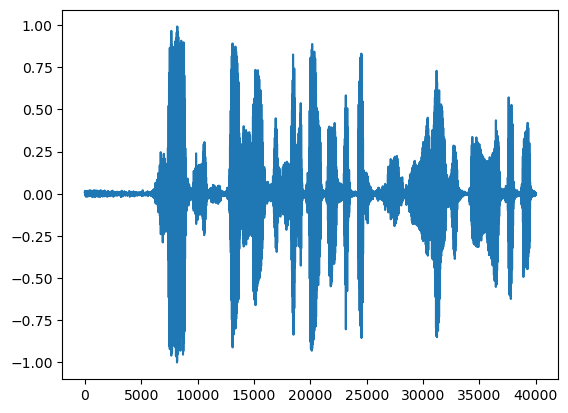

In [118]:
import matplotlib.pyplot as plt
selected_language = "nl"
idxs = np.where(y_train == language_dict[selected_language])[0]
idx = np.random.choice(idxs)

signal = torch.tensor(X_train[idx])
max = torch.max(torch.abs(signal),0,True).values
signal = signal / max
signal = torch.clip(signal,-1,1)

#Audio(y,rate=sampling_rate)

times = np.linspace(0, 40000, num=40000)
plt.plot(times,signal)



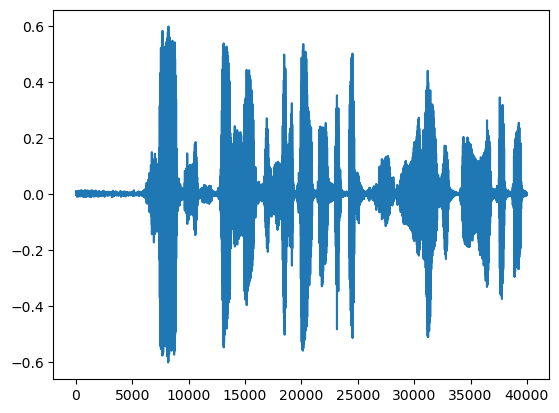

In [119]:
Audio(X_train[idx], rate=sampling_rate)
plt.plot(times,X_train[idx])

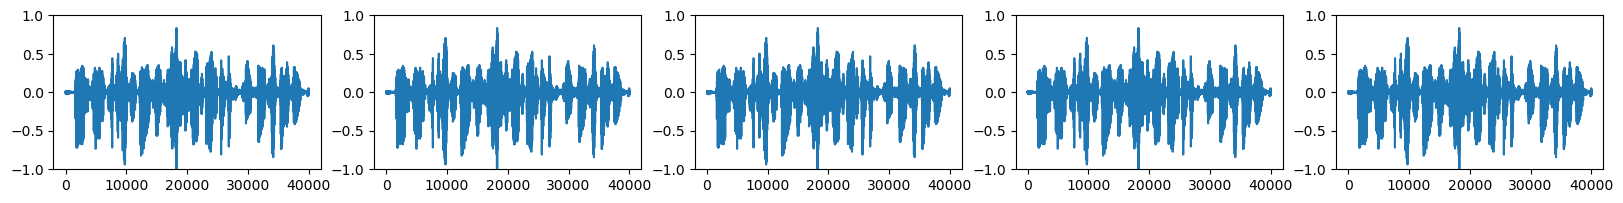

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(20,2))
times = np.linspace(0, 40000, num=40000)
plt.setp(ax, ylim=(-1,1))

for i in range(5):
    idxs = np.random.choice(y_train)
    signal = torch.tensor(X_train[idx])
    max = torch.max(torch.abs(signal),0,True).values
    signal = signal / max
    signal = torch.clip(signal,-1,1)
    ax[i].plot(times,signal)




 Reason why those plots are different is different sound recording procedures. Best option to reduce overfitting is to normalise sound with different techniques

Here, we multiply the input by a constant and subtract the max of each sample.
Follow this format to create your own normalization layer(s).

# Audio signal 1d normalization

## Normalization by maximum/minimum values. So all values were between 0 and 1

In [40]:
class AudioMinMaxNormalization(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        with torch.no_grad():
            min_val = torch.min(x,2,True).values
            max_val = torch.max(torch.abs(x),2,True).values
        x = (x-min_val) / (max_val - min_val)
        return x


d1_audio_normalization = AudioMinMaxNormalization()

## Normalization around mean and standard deviation values. So all means and std were between 0 and 1


In [9]:
class AudioMeanStdNormalization(nn.Module):
    def __init__(self):
        super().__init__()
        self.register_buffer("mean", torch.tensor(0.0))
        self.register_buffer("std", torch.tensor(1.0))

    def forward(self, x):
        with torch.no_grad():
            # Calculate mean and standard deviation
            mean = torch.mean(x)
            std = torch.std(x)
            # Update buffer values with exponential moving average
            self.mean.mul_(0.9).add_(0.1 * mean)
            self.std.mul_(0.9).add_(0.1 * std)
        # Normalize input using mean and std
        x = (x - self.mean) / self.std
        return x

d1_audio_normalization = AudioMeanStdNormalization

# Audio signal 2d normalization

## Transform audio waveform into spectrogram and normalize it

In [22]:
class ExampleNormalization(nn.Module):
    def __init__(self, sampling_rate):
        super().__init__()
        self.register_buffer("sampling_rate",torch.tensor(sampling_rate))
        self.register_buffer("n_fft",torch.tensor(2 ** (sampling_rate // 1000 * 10).bit_length()))
        self.register_buffer("hop_length",self.n_fft // 4)
        self.spectrogram = torchaudio.transforms.Spectrogram(n_fft=self.n_fft, hop_length=self.hop_length)
        self.spectrogram_db = torchaudio.transforms.AmplitudeToDB()

    def forward(self, x):
        # torch no_grad is used since we don't want to save the gradient
        # for the pre-processing steps
        with torch.no_grad():
            # we multiply the input by the constant
            max_amplitude = torch.max(torch.abs(x),2,keepdim=True).values
            normalized_x = x / max_amplitude
            # Convert the audio to a spectrogram
            spectrogram = self.spectrogram(normalized_x)
            # Convert the spectrogram to a decibel-scaled spectrogram
            spectrogram_db = self.spectrogram_db(spectrogram)

            # Normalize the spectrogram to have a mean of 0 and a standard deviation of 1

            spectrogram_normalized = (spectrogram_db - spectrogram_db.mean()) / spectrogram_db.std()

            # Convert the spectrogram back to a PyTorch tensor
            #spectrogram_normalized = spectrogram_normalized.unsqueeze(0)

            return spectrogram_normalized

example_normalization = ExampleNormalization(8000)

In [29]:
class ExampleNormalization(nn.Module):
    def __init__(self):
        super().__init__()
        self.sampling_rate = 8000
        self.n_fft = 2 ** (self.sampling_rate // 1000 * 10).bit_length()
        self.hop_length = self.n_fft // 4
        self.spectrogram = torchaudio.transforms.Spectrogram(n_fft=self.n_fft, hop_length=self.hop_length)
        self.spectrogram_db = torchaudio.transforms.AmplitudeToDB()

    def forward(self, x):
        # torch no_grad is used since we don't want to save the gradient
        # for the pre-processing steps
        with torch.no_grad():
            # we multiply the input by the constant
            max_amplitude = torch.max(torch.abs(x),2,keepdim=True).values
            normalized_x = x / max_amplitude
            # Convert the audio to a spectrogram
            spectrogram = self.spectrogram(normalized_x)
            # Convert the spectrogram to a decibel-scaled spectrogram
            spectrogram_db = self.spectrogram_db(spectrogram)

            # Normalize the spectrogram to have a mean of 0 and a standard deviation of 1

            spectrogram_normalized = (spectrogram_db - spectrogram_db.mean()) / spectrogram_db.std()

            # Convert the spectrogram back to a PyTorch tensor
            #spectrogram_normalized = spectrogram_normalized.unsqueeze(0)

            return spectrogram_normalized

example_normalization = ExampleNormalization()

## Transform audio waveform into MEL-spectrogram and normalize it


In [5]:
class Audio2Normalization(nn.Module):
    def __init__(self, sampling_rate ):
        super().__init__()
        # register_buffer ensures that the constant is saved with the model
        self.register_buffer("constant", torch.tensor(sampling_rate))
        self.register_buffer("n_fft", torch.tensor(2 ** (sampling_rate // 1000 * 10).bit_length() ) )
        self.register_buffer("hop_length",self.n_fft // 4)
        #self.register_buffer("mono",torchaudio.transforms.Remix(num_channels=1))

        self.mel_spec = torchaudio.transforms.MelSpectrogram(
            sample_rate=sampling_rate,
            n_fft=self.n_fft,
            hop_length=self.hop_length,
            n_mels=(self.n_fft // 2 + 1)
        )

    def forward(self, x):
        # torch no_grad is used since we don't want to save the gradient
        # for the pre-processing steps
        with torch.no_grad():
            # we multiply the input by the constant
            max_val = torch.max(torch.abs(x),2,keepdim=True).values
            normalized_x = x / max_val
            x = self.mel_spec(normalized_x)
            x = (x - x.mean()) / x.std()
        return x
sampling_rate = 8000
example_normalization = Audio2Normalization(sampling_rate)

C:\Users\Danila\anaconda3\envs\AI\lib\site-packages\torchaudio\functional\functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (65) may be set too high. Or, the value for `n_freqs` (65) may be set too low.
  warnings.warn(


In [22]:
class MFCC(nn.Module):
    def __init__(self, sampling_rate):
        super().__init__()
        self.register_buffer("sampling_rate", torch.tensor(sampling_rate))
        self.register_buffer("n_fft", torch.tensor(2 ** (sampling_rate // 1000 * 10).bit_length()))
        self.register_buffer("hop_length", self.n_fft // 4)

        self.mfc = torchaudio.transforms.MFCC(
            sample_rate=sampling_rate,
            n_mfcc=13,  # Number of MFCC coefficients to extract
            melkwargs={"n_fft": self.n_fft, "hop_length": self.hop_length}
        )

    def forward(self, x):
        # torch no_grad is used since we don't want to save the gradient
        # for the pre-processing steps
        with torch.no_grad():
            # we multiply the input by the constant
            max_amplitude = torch.max(torch.abs(x), 2, keepdim=True).values
            normalized_x = x / max_amplitude

            # Extract MFCC coefficients
            mfc = self.mfc(normalized_x)

            # Normalize the MFCC coefficients to have a mean of 0 and a standard deviation of 1
            mfcc_normalized = (mfc - mfc.mean()) / mfc.std()

            return mfcc_normalized

example_normalization = MFCC(8000)

In [30]:
# Define a sample input tensor
batch_size = 128
num_channels = 1
sequence_length = 40000
input_tensor = torch.randn(batch_size,num_channels, sequence_length)

# Create an instance of the normalization layer and pass the input tensor through it
output_tensor = example_normalization(input_tensor)

# Print the input and output tensors for comparison
print("Input tensor:\n", input_tensor.shape)
print("Output tensor:\n", output_tensor.shape)

Input tensor:
 torch.Size([128, 1, 40000])
Output tensor:
 torch.Size([128, 1, 65, 1251])


# Model for binary classification

## Creating Neural Network for 2d normalization output

In [56]:
from torch import nn, optim

# Create a sequential model
d2_model = nn.Sequential()

# Add convolutional and pooling layers
d2_model.add_module("Norm",example_normalization)
d2_model.add_module('Conv_1', nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(4,4)))
d2_model.add_module('Relu_1', nn.ReLU())
d2_model.add_module('MaxPool_1', nn.MaxPool2d(kernel_size=3))

d2_model.add_module('Conv_2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3)))
d2_model.add_module('Relu_2', nn.ReLU())
d2_model.add_module('MaxPool_2', nn.MaxPool2d(kernel_size=2))

d2_model.add_module('Conv_3', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(2,2)))
d2_model.add_module('Relu_3', nn.ReLU())
d2_model.add_module("MaxPool_3",nn.MaxPool2d(2))

d2_model.add_module('Conv_4', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(2,2)))
d2_model.add_module('Relu_4', nn.ReLU())
d2_model.add_module("MaxPool_4",nn.MaxPool2d(2))


d2_model.add_module("Flatten", nn.Flatten())

d2_model.add_module("Linear", nn.Linear(in_features=128*51,out_features=64,bias=True))
d2_model.add_module('Dropout_1', nn.Dropout(0.4))
d2_model.add_module('Relu_L_1', nn.ReLU())

d2_model.add_module("Linear_2", nn.Linear(in_features=64,out_features=32,bias=True))
d2_model.add_module('Dropout_2', nn.Dropout(0.4))
d2_model.add_module('Relu_L_2', nn.ReLU())

d2_model.add_module("Linear_3",nn.Linear(32,1,True))
d2_model.add_module('Out_activation', nn.Sigmoid())



d2_model = d2_model.to(device)

# Creating 2d model in class

In [7]:
class ResModel(nn.Module):
    def __init__(self):
        super(ResModel,self).__init__()

        self.Norm = example_normalization
        self.Conv_1 = nn.Conv2d(1,16,(3,3),padding=1)
        self.Conv_11 = nn.Conv2d(1,16,(1,1))
        self.Conv_11.weight = nn.Parameter(torch.ones((16,1,1,1)))
        self.Conv_11.weight.requires_grad = False
        self.ReLU_1 = nn.ReLU()
        self.MaxPool_1 = nn.MaxPool2d(kernel_size=3)

        self.Conv_2 = nn.Conv2d(16,32,(3,3),padding=1)
        self.Conv_21 = nn.Conv2d(16,32,(1,1))
        self.Conv_21.weight = nn.Parameter(torch.ones((32,16,1,1)))
        self.Conv_21.weight.requires_grad = False
        self.ReLU_2 = nn.ReLU()
        self.MaxPool_2 = nn.MaxPool2d(kernel_size=3)

        self.Conv_3 = nn.Conv2d(32,64,(3,3),padding=1)
        self.Conv_31 = nn.Conv2d(32,64,(1,1))
        self.Conv_31.weight = nn.Parameter(torch.ones((64,32,1,1)))
        self.Conv_31.weight.requires_grad = False
        self.ReLU_3 = nn.ReLU()
        self.MaxPool_3 = nn.MaxPool2d(kernel_size=3)

        self.Conv_4 = nn.Conv2d(64,128,(3,3),padding=1)
        self.Conv_41 = nn.Conv2d(64,128,(1,1))
        self.Conv_41.weight = nn.Parameter(torch.ones((128,64,1,1)))
        self.Conv_41.weight.requires_grad = False
        self.ReLU_4 = nn.ReLU()
        self.Flatten = nn.Flatten()

        self.Linear_1 = nn.Linear(128*2*46,1,bias=True)
        self.Out = nn.Sigmoid()


    def forward(self,inputs):
        norm = self.Norm(inputs)

        c1 = self.Conv_1(norm)
        input_1x1 = self.Conv_11(norm)
        r1 = self.ReLU_1(c1 + input_1x1)
        m1 = self.MaxPool_1(r1)

        c2 = self.Conv_2(m1)
        m1_1x1 = self.Conv_21(m1)
        r2 = self.ReLU_2(c2 + m1_1x1)
        m2 = self.MaxPool_2(r2)

        c3 = self.Conv_3(m2)
        m2_1x1 = self.Conv_31(m2)
        r3 = self.ReLU_3(c3 + m2_1x1)
        m3 = self.MaxPool_3(r3)

        c4 = self.Conv_4(m3)
        m3_1x1 = self.Conv_41(m3)
        r4 = self.ReLU_4(c4 + m3_1x1)

        x = self.Flatten(r4)

        x = self.Linear_1(x)
        x = self.Out(x)
        return x


resmodel = ResModel().to(device)

In [96]:
from torchsummary import summary
in_shape = (1,40000)
#summary(d2_model, input_size=(in_shape))
summary(resmodel,input_size=(in_shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       Spectrogram-1          [-1, 1, 65, 1251]               0
          MelScale-2          [-1, 1, 65, 1251]               0
    MelSpectrogram-3          [-1, 1, 65, 1251]               0
Audio2Normalization-4          [-1, 1, 65, 1251]               0
            Conv2d-5         [-1, 16, 65, 1251]             160
            Conv2d-6         [-1, 16, 65, 1251]              32
              ReLU-7         [-1, 16, 65, 1251]               0
         MaxPool2d-8          [-1, 16, 21, 417]               0
            Conv2d-9          [-1, 32, 21, 417]           4,640
           Conv2d-10          [-1, 32, 21, 417]             544
             ReLU-11          [-1, 32, 21, 417]               0
        MaxPool2d-12           [-1, 32, 7, 139]               0
           Conv2d-13           [-1, 64, 7, 139]          18,496
           Conv2d-14           [-1, 64

## Creating Neural Network for 1d normalization output

In [10]:
d1_model = nn.Sequential()

d1_model.add_module("Normalization",d1_audio_normalization)

d1_model.add_module("Conv_1",nn.Conv1d(1,16,6,2))
d1_model.add_module("ReLU_1",nn.ReLU())
d1_model.add_module("MaxPool_1",nn.MaxPool1d(5))

d1_model.add_module("Conv_2",nn.Conv1d(16,16,5,2))
d1_model.add_module("ReLU_2",nn.ReLU())
d1_model.add_module("MaxPool_2",nn.MaxPool1d(4))

d1_model.add_module("Conv_3", nn.Conv1d(16,32,5,2))
d1_model.add_module("ReLU_3",nn.ReLU())
d1_model.add_module("MaxPool_3",nn.MaxPool1d(4))

d1_model.add_module("Conv_4", nn.Conv1d(32,64,4,2))
d1_model.add_module("ReLU_4",nn.ReLU())
d1_model.add_module("MaxPool_4",nn.MaxPool1d(3))

d1_model.add_module("Conv_5", nn.Conv1d(64,128,3))
d1_model.add_module("ReLU_5",nn.ReLU())
d1_model.add_module("MaxPool_5",nn.MaxPool1d(2))

d1_model.add_module("Conv_6", nn.Conv1d(128,128,2))
d1_model.add_module("ReLU_6",nn.ReLU())


d1_model.add_module("Flatten",nn.Flatten())
d1_model.add_module("Linear1",nn.Linear(128*3,128,True))
d1_model.add_module("ReLU_L1",nn.ReLU())
d1_model.add_module("Dropout1",nn.Dropout(0.5))

d1_model.add_module("Linear2",nn.Linear(128,64,True))
d1_model.add_module("ReLU_L2",nn.ReLU())
d1_model.add_module("Dropout2",nn.Dropout(0.5))

d1_model.add_module("Linear3",nn.Linear(64,1,True))
d1_model.add_module("Out",nn.Sigmoid())






d1_model = d1_model.to(device)

In [67]:
from torchsummary import summary
in_shape = (1,40000)
summary(d1_model, input_size=(in_shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         Normalize-1             [-1, 1, 40000]               0
            Conv1d-2            [-1, 16, 19998]             112
              ReLU-3            [-1, 16, 19998]               0
         MaxPool1d-4             [-1, 16, 3999]               0
            Conv1d-5             [-1, 16, 1998]           1,296
              ReLU-6             [-1, 16, 1998]               0
         MaxPool1d-7              [-1, 16, 499]               0
            Conv1d-8              [-1, 32, 248]           2,592
              ReLU-9              [-1, 32, 248]               0
        MaxPool1d-10               [-1, 32, 62]               0
           Conv1d-11               [-1, 64, 30]           8,256
             ReLU-12               [-1, 64, 30]               0
        MaxPool1d-13               [-1, 64, 10]               0
           Conv1d-14               [-1,

# Model for Multi-classification

## 1d Model

In [194]:
final_model = nn.Sequential()

final_model.add_module("Normalization",d1_audio_normalization)

final_model.add_module("Conv_1",nn.Conv1d(1,16,3,3))  # 3
final_model.add_module("ReLU_1",nn.ReLU())
final_model.add_module("MaxPool_1",nn.MaxPool1d(2))

final_model.add_module("Conv_2",nn.Conv1d(16,32,3,3)) # 3
final_model.add_module("ReLU_2",nn.ReLU())
final_model.add_module("MaxPool_2",nn.MaxPool1d(2))

final_model.add_module("Conv_3", nn.Conv1d(32,64,4,2)) # 4
final_model.add_module("ReLU_3",nn.ReLU())
final_model.add_module("MaxPool_3",nn.MaxPool1d(3))

final_model.add_module("Conv_4", nn.Conv1d(64,64,4,2)) # 4
final_model.add_module("ReLU_4",nn.ReLU())
final_model.add_module("MaxPool_4",nn.MaxPool1d(3))

final_model.add_module("Conv_5", nn.Conv1d(64,128,3,3)) # 5
final_model.add_module("ReLU_5",nn.ReLU())
final_model.add_module("MaxPool_5",nn.MaxPool1d(2))

final_model.add_module("Conv_6", nn.Conv1d(128,256,3,2)) # 5
final_model.add_module("ReLU_6",nn.ReLU())

final_model.add_module("Flatten",nn.Flatten())
final_model.add_module("Linear1",nn.Linear(256*2,256,True))
final_model.add_module("ReLU_L1",nn.ReLU())
final_model.add_module("Dropout1",nn.Dropout(0.4))

final_model.add_module("Linear2",nn.Linear(256,128,True))
final_model.add_module("ReLU_L2",nn.ReLU())
final_model.add_module("Dropout2",nn.Dropout(0.4))

final_model.add_module("Linear3",nn.Linear(128,6,True))
final_model.add_module("Out",nn.Softmax(-1))



final_model = final_model.to(device)

In [195]:
from torchsummary import summary
in_shape = (1,40000)
summary(final_model, input_size=(in_shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
AudioMinMaxNormalization-1             [-1, 1, 40000]               0
            Conv1d-2            [-1, 16, 13333]              64
              ReLU-3            [-1, 16, 13333]               0
         MaxPool1d-4             [-1, 16, 6666]               0
            Conv1d-5             [-1, 32, 2222]           1,568
              ReLU-6             [-1, 32, 2222]               0
         MaxPool1d-7             [-1, 32, 1111]               0
            Conv1d-8              [-1, 64, 554]           8,256
              ReLU-9              [-1, 64, 554]               0
        MaxPool1d-10              [-1, 64, 184]               0
           Conv1d-11               [-1, 64, 91]          16,448
             ReLU-12               [-1, 64, 91]               0
        MaxPool1d-13               [-1, 64, 30]               0
           Conv1d-14             

## 2d Model

In [75]:
# Create a sequential model
d2_model = nn.Sequential()

# Add convolutional and pooling layers
d2_model.add_module("Norm",example_normalization)
d2_model.add_module('Conv_1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3,3)))
d2_model.add_module('Relu_1', nn.ReLU())
d2_model.add_module('MaxPool_1', nn.MaxPool2d(kernel_size=2))

d2_model.add_module('Conv_2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3)))
d2_model.add_module('Relu_2', nn.ReLU())
d2_model.add_module('MaxPool_2', nn.MaxPool2d(kernel_size=2))

d2_model.add_module('Conv_3', nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,3)))
d2_model.add_module('Relu_3', nn.ReLU())
d2_model.add_module("MaxPool_3",nn.MaxPool2d(2))

d2_model.add_module('Conv_4', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3)))
d2_model.add_module('Relu_4', nn.ReLU())
d2_model.add_module("MaxPool_4",nn.MaxPool2d(2))

d2_model.add_module('Conv_5', nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(2,2)))
d2_model.add_module('Relu_5', nn.ReLU())

d2_model.add_module("Flatten", nn.Flatten())
d2_model.add_module("Linear", nn.Linear(in_features=128*75,out_features=32,bias=True))
d2_model.add_module('Dropout_1', nn.Dropout(0.5))
d2_model.add_module('Relu_L_1', nn.ReLU())

d2_model.add_module("Linear_3",nn.Linear(32,6,True))
d2_model.add_module('Out_activation', nn.Softmax(-1))




d2_model = d2_model.to(device)

# Res model

In [53]:
class ResModel(nn.Module):
    def __init__(self):
        super(ResModel,self).__init__()

        self.Norm = example_normalization
        self.Conv_1 = nn.Conv2d(1,32,(3,3),padding=1)
        self.Conv_11 = nn.Conv2d(1,32,(1,1))
        self.ReLU_1 = nn.ReLU()
        self.MaxPool_1 = nn.MaxPool2d(kernel_size=2)

        self.Conv_2 = nn.Conv2d(32,64,(3,3),padding=1)
        self.Conv_21 = nn.Conv2d(32,64,(1,1))
        self.ReLU_2 = nn.ReLU()
        self.MaxPool_2 = nn.MaxPool2d(kernel_size=2)
        self.Conv_3 = nn.Conv2d(64,64,(3,3),padding=1)
        self.Conv_31 = nn.Conv2d(64,64,(1,1))
        self.ReLU_3 = nn.ReLU()
        self.MaxPool_3 = nn.MaxPool2d(kernel_size=2)

        self.Conv_4 = nn.Conv2d(64,128,(3,3),padding=1)
        self.Conv_41 = nn.Conv2d(64,128,(1,1))
        self.ReLU_4 = nn.ReLU()
        self.MaxPool_4 = nn.MaxPool2d(kernel_size=2)

        self.Conv_5 = nn.Conv2d(128,128,(3,3),padding=1)
        self.Conv_51 = nn.Conv2d(128,128,(1,1))
        self.ReLU_5 = nn.ReLU()

        self.Flatten = nn.Flatten()

        self.Linear_1 = nn.Linear(128*156,32,bias=True)
        self.Drop_1 = nn.Dropout(0.5)
        self.ReLU_L_1 = nn.ReLU()


        self.Linear_2 = nn.Linear(32,6,True)
        self.Out_activation = nn.Softmax(-1)


    def forward(self,inputs):
        norm = self.Norm(inputs)

        c1 = self.Conv_1(norm)
        input_1x1 = self.Conv_11(norm)
        r1 = self.ReLU_1(c1 + input_1x1)
        m1 = self.MaxPool_1(r1)

        c2 = self.Conv_2(m1)
        m1_1x1 = self.Conv_21(m1)
        r2 = self.ReLU_2(c2 + m1_1x1)
        m2 = self.MaxPool_2(r2)

        c3 = self.Conv_3(m2)
        m2_1x1 = self.Conv_31(m2)
        r3 = self.ReLU_3(c3 + m2_1x1)
        m3 = self.MaxPool_3(r3)

        c4 = self.Conv_4(m3)
        m3_1x1 = self.Conv_41(m3)
        r4 = self.ReLU_4(c4 + m3_1x1)
        #m4 = self.MaxPool_4(r4)

        c5 = self.Conv_5(r4)
        m4_1x1 = self.Conv_51(r4)
        r4 = self.ReLU_5(c5 + m4_1x1)

        x = self.Flatten(r4)
        x = self.Linear_1(x)
        x = self.Drop_1(x)
        x = self.ReLU_L_1(x)

        x = self.Linear_2(x)
        x = self.Out_activation(x)

        return x


resmodel = ResModel().to(device)

In [50]:
class ResModel(nn.Module):
    def __init__(self):
        super(ResModel,self).__init__()

        self.Norm = example_normalization
        self.Conv_1 = nn.Conv2d(1,32,(3,3),padding=1)
        self.BatchNorm_1 = nn.BatchNorm2d(32)
        self.Conv_11 = nn.Conv2d(1,32,(1,1))
        self.BatchNorm_11 = nn.BatchNorm2d(32)
        self.ReLU_1 = nn.ReLU()
        self.MaxPool_1 = nn.MaxPool2d(kernel_size=3)

        self.Conv_2 = nn.Conv2d(32,64,(3,3),padding=1)
        self.BatchNorm_2 = nn.BatchNorm2d(64)
        self.Conv_21 = nn.Conv2d(32,64,(1,1))
        self.BatchNorm_21 = nn.BatchNorm2d(64)
        self.ReLU_2 = nn.ReLU()
        self.MaxPool_2 = nn.MaxPool2d(kernel_size=3)

        self.Conv_3 = nn.Conv2d(64,64,(3,3),padding=1)
        self.BatchNorm_3 = nn.BatchNorm2d(64)
        self.Conv_31 = nn.Conv2d(64,64,(1,1))
        self.BatchNorm_31 = nn.BatchNorm2d(64)
        self.ReLU_3 = nn.ReLU()
        self.MaxPool_3 = nn.MaxPool2d(kernel_size=3)

        self.Conv_4 = nn.Conv2d(64,128,(3,3),padding=1)
        self.BatchNorm_4 = nn.BatchNorm2d(128)
        self.Conv_41 = nn.Conv2d(64,128,(1,1))
        self.BatchNorm_41 = nn.BatchNorm2d(128)
        self.ReLU_4 = nn.ReLU()
        self.MaxPool_4 = nn.MaxPool2d(kernel_size=3)

        self.Conv_5 = nn.Conv2d(128,128,(3,3),padding=1)
        self.BatchNorm_5 = nn.BatchNorm2d(128)
        self.Conv_51 = nn.Conv2d(128,128,(1,1))
        self.BatchNorm_51 = nn.BatchNorm2d(128)
        self.ReLU_5 = nn.ReLU()

        self.Flatten = nn.Flatten()

        self.Linear_1 = nn.Linear(128*2*46,32,bias=True) # 128*156 if all pool kernel == 2
        self.BatchNorm_L1 = nn.BatchNorm1d(32)
        self.Drop_1 = nn.Dropout(0.5)
        self.ReLU_L_1 = nn.ReLU()

        self.Linear_2 = nn.Linear(32,6,True)
        self.Out_activation = nn.Softmax(-1)

    def forward(self,inputs):
        norm = self.Norm(inputs)

        c1 = self.Conv_1(norm)
        c1 = self.BatchNorm_1(c1)
        input_1x1 = self.Conv_11(norm)
        input_1x1 = self.BatchNorm_11(input_1x1)
        r1 = self.ReLU_1(c1 + input_1x1)
        m1 = self.MaxPool_1(r1)

        c2 = self.Conv_2(m1)
        c2 = self.BatchNorm_2(c2)
        m1_1x1 = self.Conv_21(m1)
        m1_1x1 = self.BatchNorm_21(m1_1x1)
        r2 = self.ReLU_2(c2 + m1_1x1)
        m2 = self.MaxPool_2(r2)

        c3 = self.Conv_3(m2)
        c3 = self.BatchNorm_3(c3)
        m2_1x1 = self.Conv_31(m2)
        m2_1x1 = self.BatchNorm_31(m2_1x1)
        r3 = self.ReLU_3(c3 + m2_1x1)
        m3 = self.MaxPool_3(r3)

        c4 = self.Conv_4(m3)
        c4 = self.BatchNorm_4(c4)
        m3_1x1 = self.Conv_41(m3)
        m3_1x1 = self.BatchNorm_41(m3_1x1)
        r4 = self.ReLU_4(c4 + m3_1x1)

        c5 = self.Conv_5(r4)
        c5 = self.BatchNorm_5(c5)
        r4_1x1 = self.Conv_51(r4)
        r4_1x1 = self.BatchNorm_51(r4_1x1)
        r5 = self.ReLU_5(c5 + r4_1x1)

        x = self.Flatten(r5)
        x = self.Linear_1(x)
        x = self.BatchNorm_L1(x)
        x = self.Drop_1(x)
        x = self.ReLU_L_1(x)

        x = self.Linear_2(x)
        x = self.Out_activation(x)

        return x


res2model = ResModel().to(device)


In [32]:
from torchsummary import summary
in_shape = (1,40000)
summary(res2model, input_size=(in_shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       Spectrogram-1          [-1, 1, 65, 1251]               0
     AmplitudeToDB-2          [-1, 1, 65, 1251]               0
ExampleNormalization-3          [-1, 1, 65, 1251]               0
            Conv2d-4         [-1, 32, 65, 1251]             320
       BatchNorm2d-5         [-1, 32, 65, 1251]              64
            Conv2d-6         [-1, 32, 65, 1251]              64
       BatchNorm2d-7         [-1, 32, 65, 1251]              64
              ReLU-8         [-1, 32, 65, 1251]               0
         MaxPool2d-9          [-1, 32, 21, 417]               0
           Conv2d-10          [-1, 64, 21, 417]          18,496
      BatchNorm2d-11          [-1, 64, 21, 417]             128
           Conv2d-12          [-1, 64, 21, 417]           2,112
      BatchNorm2d-13          [-1, 64, 21, 417]             128
             ReLU-14          [-1, 64

# Train loop of binary model

In [8]:
from torch import optim


def train_model(model,train_en_es_loader,test_en_es_loader):
    optimizer = optim.Adam(model.parameters(),lr=0.001)
    binary_crossentropy_loss = nn.BCELoss(reduction="mean")
    #crossentropy_loss = nn.CrossEntropyLoss(reduction="mean")
    num_epochs = 20
    model.train()
    train_loss_history = []
    test_loss_history = []
    train_acc_history = []
    test_acc_history = []

    for epoch in range(num_epochs):
        model.train()
        print('Currently training epoch {} of {}'.format(epoch, num_epochs))


        running_train_acc = 0
        running_train_loss = 0

        running_test_acc = 0
        running_test_loss = 0
        for signals,labels in train_en_es_loader:
            signals = signals.unsqueeze(1).to(device)
            labels = labels.unsqueeze(1).to(device)
            optimizer.zero_grad()
            predictions = model(signals)

            train_accuracy = ((predictions > 0.5) == labels).sum().item() / len(labels)
            loss = binary_crossentropy_loss(predictions,labels)

            running_train_acc += train_accuracy
            running_train_loss += float(loss)

            loss.backward()
            optimizer.step()

        train_acc = running_train_acc / len(train_en_es_loader)

        train_loss = running_train_loss / len(train_en_es_loader)

        train_acc_history.append(train_acc)
        train_loss_history.append(train_loss)

        model.eval()
        with torch.no_grad():
            for signals, labels in test_en_es_loader:
                signals = signals.unsqueeze(1).to(device)
                labels = labels.unsqueeze(1).to(device)
                predictions = model(signals)

                test_accuracy = ((predictions > 0.5) == labels).sum().item() / len(labels)
                test_loss = binary_crossentropy_loss(predictions,labels)

                running_test_acc += test_accuracy
                running_test_loss += float(test_loss)


            test_acc = running_test_acc / len(test_en_es_loader)
            test_loss = running_test_loss / len(test_en_es_loader)
            test_acc_history.append(test_acc)
            test_loss_history.append(test_loss)
        print(f"Accuracy on train set is {train_acc} and on Test set is {test_acc}")
    return train_loss_history , test_loss_history,train_acc_history,test_acc_history



train_loss_history , test_loss_history,train_acc_history,test_acc_history = train_model(resmodel,train_en_es_loader,test_en_es_loader)

Currently training epoch 0 of 20
Accuracy on train set is 0.50087890625 and on Test set is 0.51171875
Currently training epoch 1 of 20
Accuracy on train set is 0.50087890625 and on Test set is 0.51171875
Currently training epoch 2 of 20
Accuracy on train set is 0.5005859375 and on Test set is 0.5390625
Currently training epoch 3 of 20
Accuracy on train set is 0.49970703125 and on Test set is 0.525390625
Currently training epoch 4 of 20
Accuracy on train set is 0.50322265625 and on Test set is 0.525390625
Currently training epoch 5 of 20
Accuracy on train set is 0.5017578125 and on Test set is 0.498046875
Currently training epoch 6 of 20
Accuracy on train set is 0.50263671875 and on Test set is 0.498046875
Currently training epoch 7 of 20
Accuracy on train set is 0.5005859375 and on Test set is 0.552734375
Currently training epoch 8 of 20
Accuracy on train set is 0.5017578125 and on Test set is 0.525390625
Currently training epoch 9 of 20
Accuracy on train set is 0.5 and on Test set is 

# Training multi-classification model

In [51]:
from torch import optim
def multi_train_model(model,train_en_es_loader,test_en_es_loader):
    optimizer = optim.Adam(model.parameters(),lr=0.003)
    crossentropy_loss = nn.CrossEntropyLoss()
    num_epochs = 40
    model.train()
    train_loss_history = []
    test_loss_history = []
    train_acc_history = []
    test_acc_history = []
    y_pred = []
    y_true = []
    model_outputs_test = []

    for epoch in range(num_epochs):
        model.train()
        print('Currently training epoch {} of {}'.format(epoch, num_epochs))


        running_train_acc = 0
        running_train_loss = 0

        running_test_acc = 0
        running_test_loss = 0
        for signals,labels in train_en_es_loader:
            signals = signals.unsqueeze(1).to(device)
            labels = labels.to(device).byte()
            optimizer.zero_grad()
            predictions = model(signals)

            train_accuracy = (torch.max(predictions,dim=1,keepdim=True)[1].flatten() == labels).sum() / len(labels)
            loss = crossentropy_loss(predictions,labels)

            running_train_acc += train_accuracy.item()
            running_train_loss += float(loss)

            loss.backward()
            optimizer.step()

        train_acc = running_train_acc / len(train_en_es_loader)

        train_loss = running_train_loss / len(train_en_es_loader)

        train_acc_history.append(train_acc)
        train_loss_history.append(train_loss)

        model.eval()
        with torch.no_grad():
            for signals, labels in test_en_es_loader:
                signals = signals.unsqueeze(1).to(device)
                labels = labels.to(device).byte()
                predictions = model(signals)
                test_accuracy = (torch.max(predictions,dim=1,keepdim=True)[1].flatten() == labels).sum() / len(labels)
                test_loss = crossentropy_loss(predictions,labels)
                #print((torch.max(predictions,dim=1,keepdim=True)[1]).shape )
                #print((torch.max(torch.exp(predictions), 1)[1]).shape)
                output = (torch.max(torch.exp(predictions),1)[1]).data.cpu().numpy()
                y_pred.extend(output)

                y_true.extend(labels.data.cpu().numpy())
                model_outputs_test.extend(predictions.data.cpu().numpy())
                running_test_acc += test_accuracy.item()
                running_test_loss += float(test_loss)


            test_acc = running_test_acc / len(test_en_es_loader)
            test_loss = running_test_loss / len(test_en_es_loader)
            test_acc_history.append(test_acc)
            test_loss_history.append(test_loss)
        print(f"Accuracy on train set is {train_acc} and on Test set is {test_acc}")
    return train_loss_history , test_loss_history,train_acc_history,test_acc_history, y_true, y_pred, model_outputs_test



train_loss_history , test_loss_history,train_acc_history,test_acc_history, y_true, y_pred, model_outputs_test = multi_train_model(res2model,train_loader,test_loader)

Currently training epoch 0 of 40
Accuracy on train set is 0.30828900730356257 and on Test set is 0.19051535113861687
Currently training epoch 1 of 40
Accuracy on train set is 0.47412455684327065 and on Test set is 0.27631578947368424
Currently training epoch 2 of 40
Accuracy on train set is 0.5568484042553191 and on Test set is 0.5142543880563033
Currently training epoch 3 of 40
Accuracy on train set is 0.6226728723404256 and on Test set is 0.4945175443824969
Currently training epoch 4 of 40
Accuracy on train set is 0.6859485817716476 and on Test set is 0.3895285098176253
Currently training epoch 5 of 40
Accuracy on train set is 0.7369791668780307 and on Test set is 0.524671052631579
Currently training epoch 6 of 40
Accuracy on train set is 0.781748670212766 and on Test set is 0.586896930870257
Currently training epoch 7 of 40
Accuracy on train set is 0.8066267732610094 and on Test set is 0.6600877203439411
Currently training epoch 8 of 40
Accuracy on train set is 0.8322251775163285 an

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

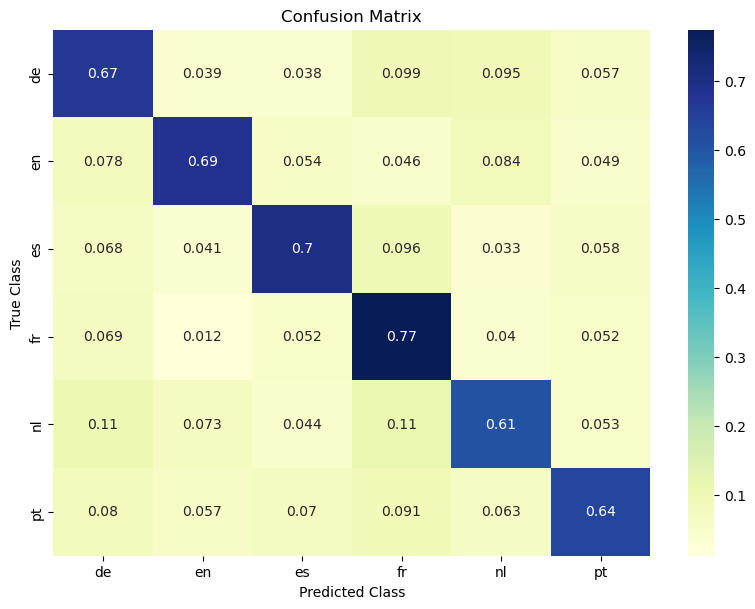

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None],
index = [i for i in language_dict],
columns = [i for i in language_dict])
plt.figure(figsize = (8,6))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"),
plt.xlabel("Predicted Class")
plt.show()

# Plot loss of train and test dataset


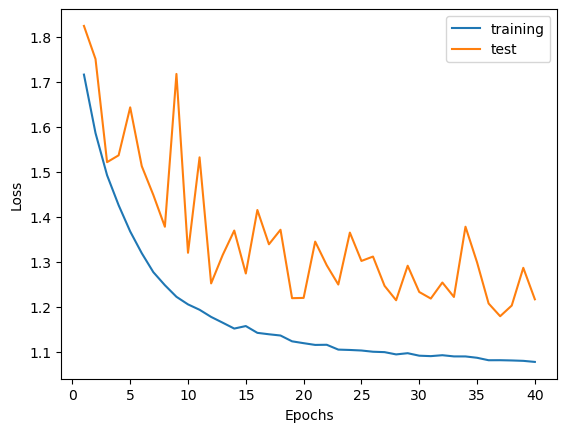

In [53]:



plt.plot(range(1,len(train_loss_history) +1), train_loss_history)
plt.plot(range(1,len(test_loss_history) +1), test_loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["training","test"])
plt.show()


# Plot accuracy of train and test dataset


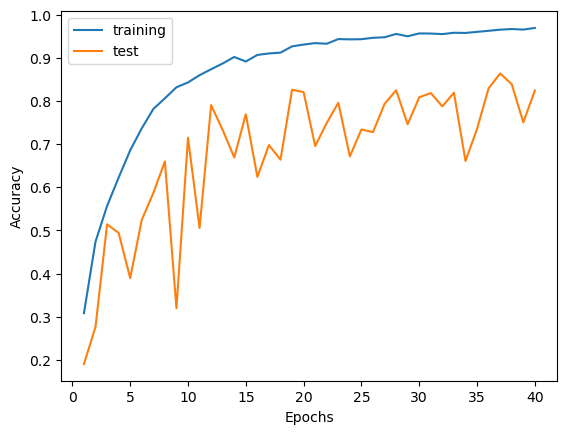

In [54]:
import matplotlib.pyplot as plt


plt.plot(range(1,len(train_acc_history) +1), train_acc_history)
plt.plot(range(1,len(test_acc_history) +1), test_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training","test"])
plt.show()

### Model saving

We need to save the model using torchscript, in order to upload the model file to the competition server.
This may give errors for the following reason:

* In your model class, or layer classes, you use numpy functions or arrays, rather than tensors.

Thus make sure that you use torch tensors and functions inside these classes. Almost any numpy function
can also be performed using torch. Look at the torch documentation for further reference.

Saving the model to torchscript

In [56]:
torch.jit.save(torch.jit.script(res2model), "model_test.pt")

### Loading the model from torchscript

This is what the competition server will be doing with your uploaded model.

In [7]:
model = torch.jit.load("model_test.pt")

In [8]:
model(inputs)

tensor([[[ 22.2316]],

        [[ 54.1806]],

        [[  0.6662]],

        [[-13.7787]]], grad_fn=<ViewBackward0>)

### Making a PCA plot of the output space

In [100]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Below we generate some random model outptus and targets, you must replace these with your own model's
output and the corresponding true targets.

In [76]:
y_train.shape

(6000,)

In [105]:
model_outputs = torch.randn(1200, 6)

targets = torch.randint(0, 6, (1200,))

tensor([-0.3505, -0.0334, -0.8691, -0.0016,  1.5723,  0.4506])


In [102]:
outputs_PCA = PCA(n_components=2).fit_transform(model_outputs)

NameError: name 'outputs_PCA' is not defined

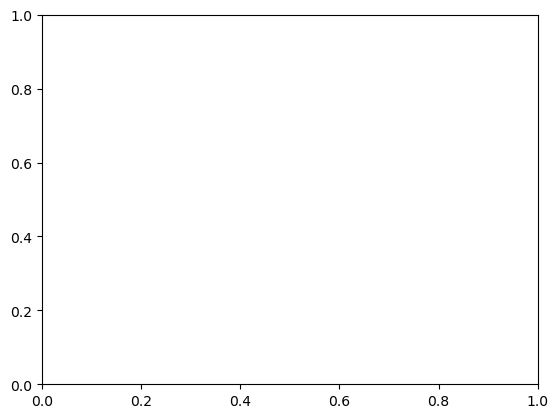

In [63]:
fig, ax = plt.subplots()
scatter = ax.scatter(*outputs_PCA.T, c=targets, cmap="tab10", alpha=0.3)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
# set legend labels as languages
for i, text in enumerate(legend1.get_texts()):
    text.set_text(languages[i]);

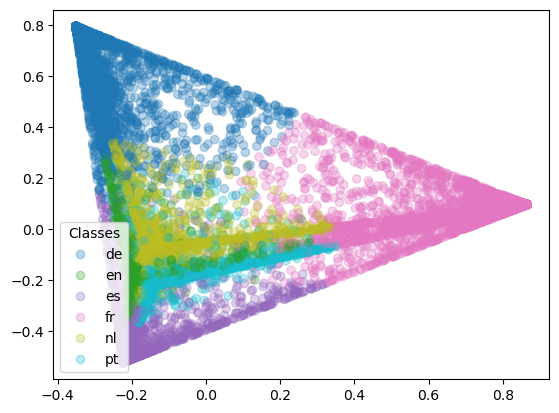

In [55]:
from sklearn.decomposition import PCA
outputs_PCA_test = PCA(n_components=2).fit_transform(model_outputs_test)
fig, ax = plt.subplots()
scatter = ax.scatter(*outputs_PCA_test.T, c=y_pred, cmap="tab10", alpha=0.3)
legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
for i, text in enumerate(legend.get_texts()):
    text.set_text(languages[i]);